In [19]:

import scipy.io
import numpy as np
import matplotlib
%matplotlib widget
import matplotlib.pyplot as plt
import torch
from anarx import ANARX_TWO
from utilities import lag_matrix


In [20]:
mat = scipy.io.loadmat('data/miso_nosteps')
a = torch.load("models/anarxreal1803.pt")
a.nlags

20

In [21]:
u1 = mat['u1_v']
u2 = mat['u2_v']
y = mat['y_v']


In [22]:


u1 = torch.squeeze(torch.from_numpy(u1))
u2 = torch.squeeze(torch.from_numpy(u2))
y = torch.squeeze(torch.from_numpy(y))
lagged_u1 = -lag_matrix(u1, a.nlags)
lagged_u2 = lag_matrix(u2, a.nlags)
# lagged_u1 = torch.zeros_like(lagged_u1)

100%|██████████| 1200/1200 [00:10<00:00, 116.66it/s]


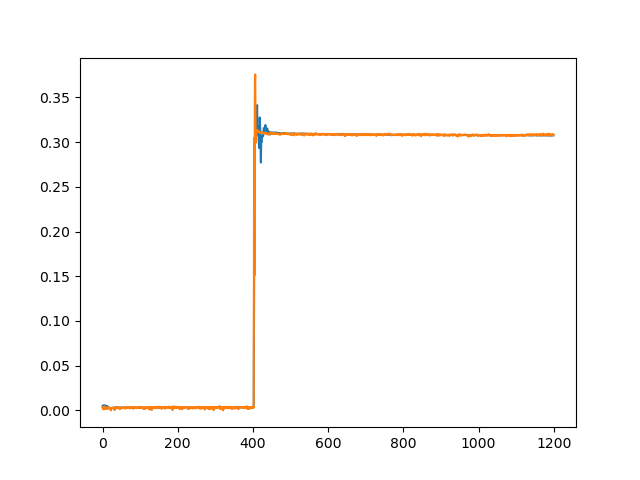

In [23]:
from tqdm import tqdm

y_hat = torch.zeros_like(u1)
lags = a.initLags()

# Predict whole Dataset
for i in tqdm(range(len(u1))):
    y_hat[i] = a(lagged_u1[i], lagged_u2[i], lags)
    lags = torch.roll(lags, 1, 0)
    lags[0] = y_hat[i]
plt.plot(y_hat.detach().numpy())
plt.plot(y)
plt.show()

In [24]:
a.nlags



20